In [9]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [10]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Train/'
val_dir = './Validation/'
test_dir = './Test/'


현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [11]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [12]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[0.9992798 , 0.9992798 , 0.9992798 ],
         [0.99588615, 0.99588615, 0.99588615],
         [0.98576856, 0.98576856, 0.98576856],
         ...,
         [0.98693585, 0.98693585, 0.98693585],
         [0.98291576, 0.98291576, 0.98291576],
         [0.9788957 , 0.9788957 , 0.9788957 ]],

        [[0.997821  , 0.997821  , 0.997821  ],
         [0.9988038 , 0.9988038 , 0.9988038 ],
         [0.99324936, 0.99324936, 0.99324936],
         ...,
         [0.96516615, 0.96516615, 0.96516615],
         [0.9619501 , 0.9619501 , 0.9619501 ],
         [0.95719635, 0.95719635, 0.95719635]],

        [[0.9963622 , 0.9963622 , 0.9963622 ],
         [0.9991394 , 0.9991394 , 0.9991394 ],
         [0.99616694, 0.99616694, 0.99616694],
         ...,
         [0.93401843, 0.93401843, 0.93401843],
         [0.93262726, 0.93262726, 0.93262726],
         [0.93182325, 0.93182325, 0.93182325]],

        ...,

        [[0.95294124, 0.95294124, 0.95294124],
         [0.9472423 , 0.9472423 , 0.9472423 

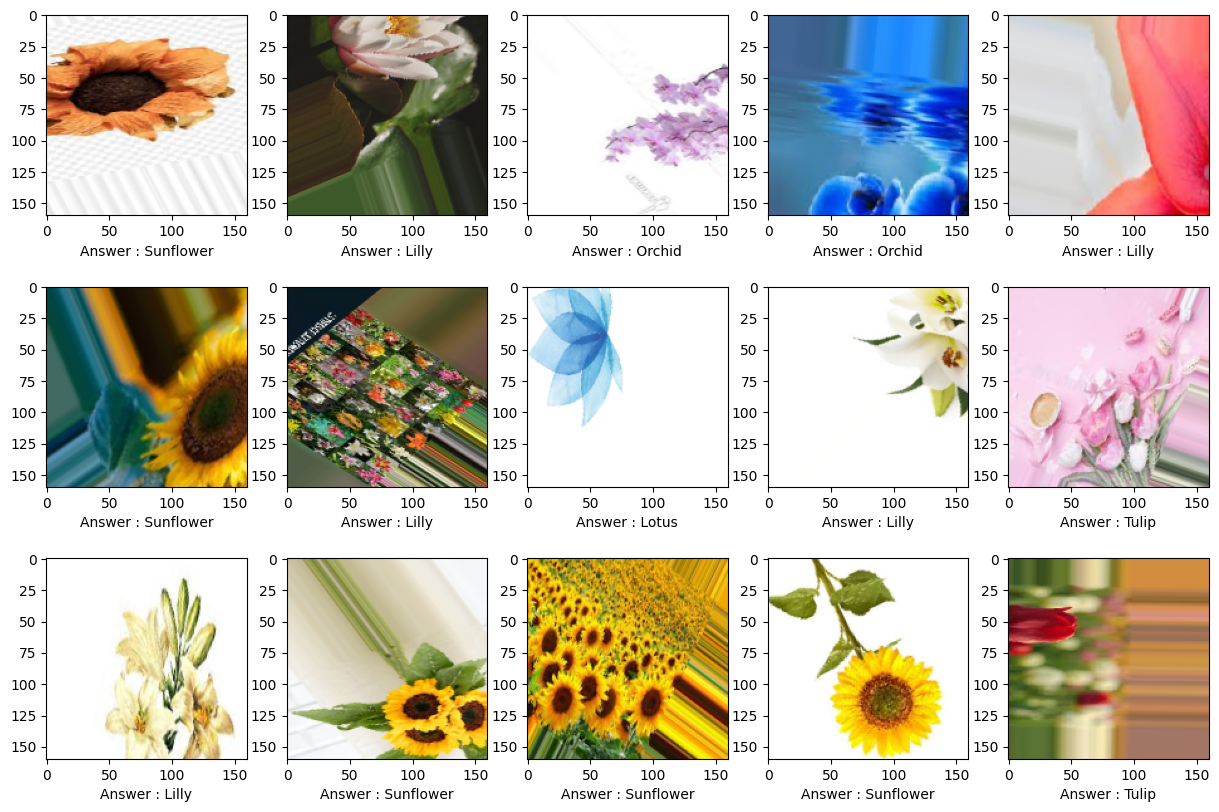

In [13]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [14]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

#model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.
 
model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()
 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 80, 80, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 819200)            0         
                                                                 
 dense_2 (Dense)             (None, 25)                20480025  
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 130       
                                                      

In [15]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N05_size160_conv1-128_den1-25_epo15_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=15, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/15
120/120 [==============================] - 553s 5s/step - loss: 2.5545 - accuracy: 0.3616 - val_loss: 1.3808 - val_accuracy: 0.4444
Epoch 2/15
120/120 [==============================] - 512s 4s/step - loss: 1.4536 - accuracy: 0.4165 - val_loss: 1.3479 - val_accuracy: 0.5022
Epoch 3/15
120/120 [==============================] - 504s 4s/step - loss: 1.3853 - accuracy: 0.4698 - val_loss: 1.3788 - val_accuracy: 0.4681
Epoch 4/15
120/120 [==============================] - 517s 4s/step - loss: 1.3551 - accuracy: 0.4797 - val_loss: 1.3049 - val_accuracy: 0.5230
Epoch 5/15
120/120 [==============================] - 512s 4s/step - loss: 1.3651 - accuracy: 0.4761 - val_loss: 1.2858 - val_accuracy: 0.4800
Epoch 6/15
120/120 [==============================] - 502s 4s/step - loss: 1.3256 - accuracy: 0.4570 - val_loss: 1.2498 - val_accuracy: 0.5096
Epoch 7/15
120/120 [==============================] - 502s 4s/step - loss: 1.2909 - accuracy: 0.4816 - val_loss: 1.2085 - val_accuracy: 0.5200

In [17]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


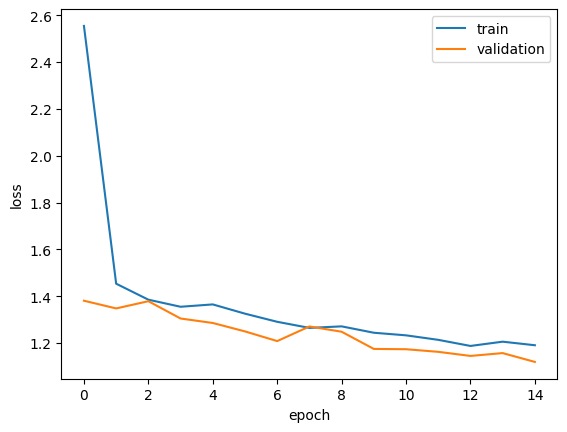

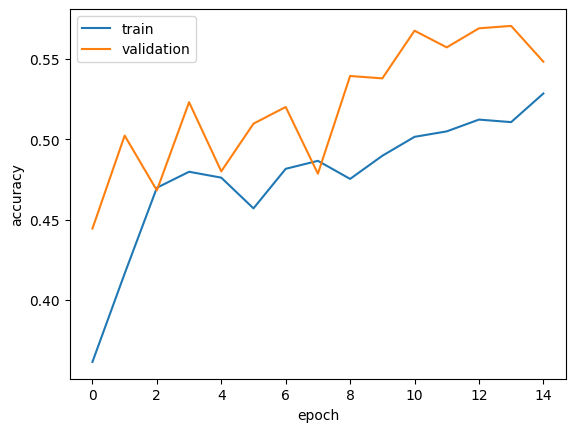

In [18]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 18s 975ms/step - loss: 1.0942 - accuracy: 0.5600


[1.094192385673523, 0.5600000023841858]

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
[0. 0. 0. 1. 0.]
32
1/1 [==============================] - 3s 3s/step
[[6.03288524e-02 6.29089586e-03 7.42459530e-03 8.89221132e-01
  3.67345288e-02]
 [9.71473455e-02 2.24242300e-01 4.26956236e-01 5.84061025e-03
  2.45813563e-01]
 [4.94738948e-03 1.17146912e-04 1.10902947e-04 9.92361128e-01
  2.46343506e-03]
 [4.12638561e-04 1.83389466e-06 2.29274451e-06 9.99211311e-01
  3.72027105e-04]
 [1.83151722e-01 5.91278195e-01 1

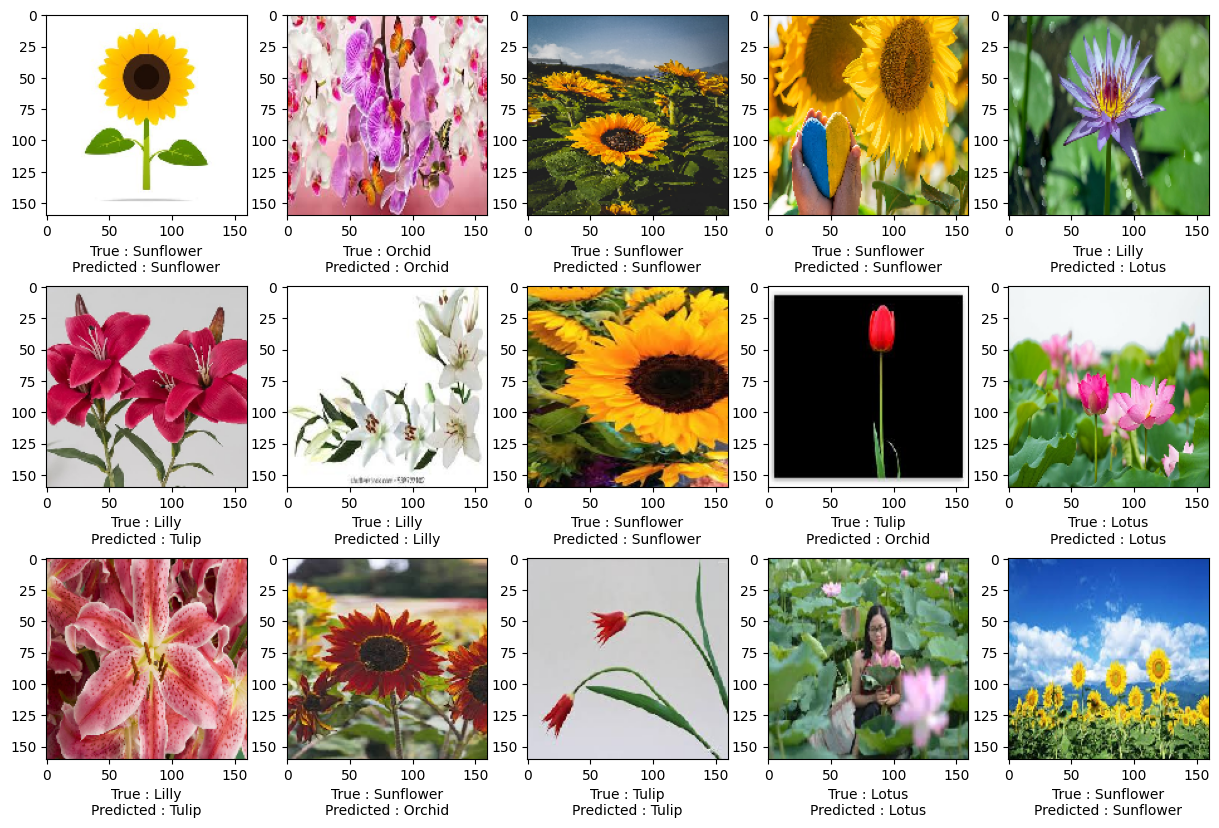

In [20]:
# test 평가 시각화
test_images, test_labels = next(test_gen)  

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]  
    predicted_label = labels_dict[np.argmax(pred[i])]  
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()